In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn


In [2]:
import torch.nn.functional as F #activation functions
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root="../Data",train=True,download=True,transform=transform)
test_data = datasets.MNIST(root="../Data",train=False,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.41MB/s]


In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
int(np.random.randint(0,59999,1))

/tmp/ipython-input-4101927462.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(np.random.randint(0,59999,1))


22406

In [8]:
# index of last image is 59999
image,label=train_data[59999]

In [9]:
image,label=train_data[np.random.randint(0,59999,1)[0]]

In [10]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
image.shape

torch.Size([1, 28, 28])

the number in the image is : 1


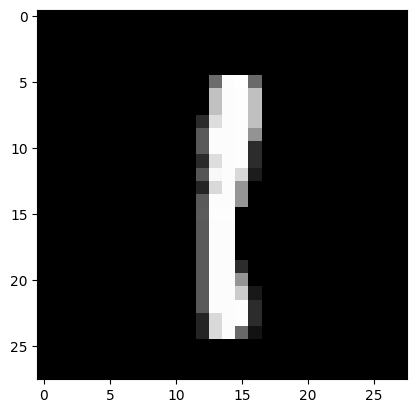

In [12]:
print(f"the number in the image is : {label}")
plt.imshow(image.reshape((28,28)),cmap="gray")

In [13]:
28*28

784

In [14]:
# MNIST is having 28 x 28 pixel images in 1 channel
image.shape

torch.Size([1, 28, 28])

In [15]:
# 784--> 120-->84-->10
# 784 is input layers and 10[0 to 9 digits]

In [16]:
#layer1(input-->>hidden1)
#weights : 784 inputs*120 neurons = 94080
#biases :120 neurons = 120
#total parameters = 120+94080 = 94200

#layer2(hidden1-->>hidden2)
#weights:120 inputs * 84 neurons = 10080
# biases : 84
# total = 10164

#layer3(hidden2-->>output)
#weights: 84*10 = 840
#biases: 10
#total = 850

#grand_total = 94200+10164+850 = 105214 parameters

In [17]:
#Data Loader Configuration
#batch size = 100 taking 100 samples then compute loss and update weight
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
test_loader = DataLoader(test_data,shuffle=False,batch_size=500)

In [18]:
class MultiLayerPerceptronModel(nn.Module):
  def __init__(self,in_size=784,out_size=10,layers=[120,84]):
    super().__init__()
    self.ffn1 = nn.Linear(in_size,layers[0])
    self.ffn2 = nn.Linear(layers[0],layers[1])
    self.ffn3 = nn.Linear(layers[1],out_size)

  def forward(self,X):
    X = F.relu(self.ffn1(X))
    X = F.relu(self.ffn2(X))
    X = self.ffn3(X)

    return F.log_softmax(X,dim=1)

In [19]:
torch.manual_seed(101)
model = MultiLayerPerceptronModel()
model

MultiLayerPerceptronModel(
  (ffn1): Linear(in_features=784, out_features=120, bias=True)
  (ffn2): Linear(in_features=120, out_features=84, bias=True)
  (ffn3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
[p.numel() for p in model.parameters() if p.requires_grad==True]

[94080, 120, 10080, 84, 840, 10]

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [22]:
for images,labels in train_loader:
  print(f" batch shape is : {images.shape}")
  break

 batch shape is : torch.Size([100, 1, 28, 28])


In [23]:
images.view(100,-1).size()

torch.Size([100, 784])

In [24]:
# train the model
import time
start_time = time.time()
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr=0
  tst_corr=0

  #run the training batches
  for b,(X_train,y_train) in enumerate(train_loader):
    b = b+1
    y_pred = model(X_train.view(100,-1))  #Flattening of training images
    loss = criterion(y_pred,y_train)

    #tally the number of correct predictions
    predicted = torch.max(y_pred.data,1)[1]

    batch_corr = (predicted==y_train).sum()
    trn_corr+=batch_corr

    #update the parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print intermediate results
    if b%200==0:
      print(f"Epoch: {i:2} batch: {b:2} [{100*b}/60000] loss: {loss.item(): 10.8f} accuracy: {trn_corr.item()*100/(100*b):7.3f}%")

  #update train loss and accuracy
  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Run the testing batches
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test.view(500,-1))

      predicted = torch.max(y_val.data,1)[1]
      tst_corr+= (predicted==y_test).sum()

  # update test loss and accuracy
  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)
  print(f"\n\nDuration: {time.time()-start_time: .0f} seconds")

train_losses.append(loss)
train_correct.append(trn_corr)

Epoch:  0 batch: 200 [20000/60000] loss:  0.34772694 accuracy:  88.325%
Epoch:  0 batch: 400 [40000/60000] loss:  0.29232892 accuracy:  91.438%
Epoch:  0 batch: 600 [60000/60000] loss:  0.20988105 accuracy:  92.668%


Duration:  11 seconds
Epoch:  1 batch: 200 [20000/60000] loss:  0.12878652 accuracy:  96.015%
Epoch:  1 batch: 400 [40000/60000] loss:  0.04040085 accuracy:  96.045%
Epoch:  1 batch: 600 [60000/60000] loss:  0.10523736 accuracy:  96.167%


Duration:  23 seconds
Epoch:  2 batch: 200 [20000/60000] loss:  0.05162331 accuracy:  96.875%
Epoch:  2 batch: 400 [40000/60000] loss:  0.18249881 accuracy:  96.795%
Epoch:  2 batch: 600 [60000/60000] loss:  0.09931194 accuracy:  96.815%


Duration:  36 seconds
Epoch:  3 batch: 200 [20000/60000] loss:  0.26284140 accuracy:  97.130%
Epoch:  3 batch: 400 [40000/60000] loss:  0.03490723 accuracy:  97.115%
Epoch:  3 batch: 600 [60000/60000] loss:  0.19064718 accuracy:  97.158%


Duration:  47 seconds
Epoch:  4 batch: 200 [20000/60000] loss: